# Analyzing the purchases of our customers for 1 year in America E-commerce dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('E-commerce Dataset.csv')

In [3]:
data

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order
51286,2018-02-28,13:19:25,2.0,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5.0,0.2,14.0,1.4,Medium,credit_card
51287,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card
51288,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [5]:
# Check missing values for each column
data.isnull().mean()

Order_Date             0.000000
Time                   0.000000
Aging                  0.000019
Customer_Id            0.000000
Gender                 0.000000
Device_Type            0.000000
Customer_Login_type    0.000000
Product_Category       0.000000
Product                0.000000
Sales                  0.000019
Quantity               0.000039
Discount               0.000019
Profit                 0.000000
Shipping_Cost          0.000019
Order_Priority         0.000039
Payment_method         0.000000
dtype: float64

In [6]:
# Drop missing values
data.dropna(inplace=True)

In [7]:
# check missing values for each column again
data.isnull().sum().sort_values(ascending=False)

Order_Date             0
Time                   0
Aging                  0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Shipping_Cost          0
Order_Priority         0
Payment_method         0
dtype: int64

In [8]:
data.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000,51282.000000
mean,5.255187,58159.746656,152.337350,2.502964,0.303838,70.401796,7.041166
std,2.960073,26031.763189,66.492468,1.511834,0.131025,48.728131,4.871685
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35841.500000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61021.500000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80739.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


What devices do my customers use to reach me?

In [9]:
data['Device_Type'].value_counts()

Web       47624
Mobile     3658
Name: Device_Type, dtype: int64

# Gender Distribution by Category

In [22]:
data.groupby(by=['Product_Category'])['Gender'].value_counts()

Product_Category    Gender
Auto & Accessories  Male       5176
                    Female     2321
Electronic          Female     1484
                    Male       1217
Fashion             Male      14281
                    Female    11365
Home & Furniture    Female     7980
                    Male       7458
Name: Gender, dtype: int64

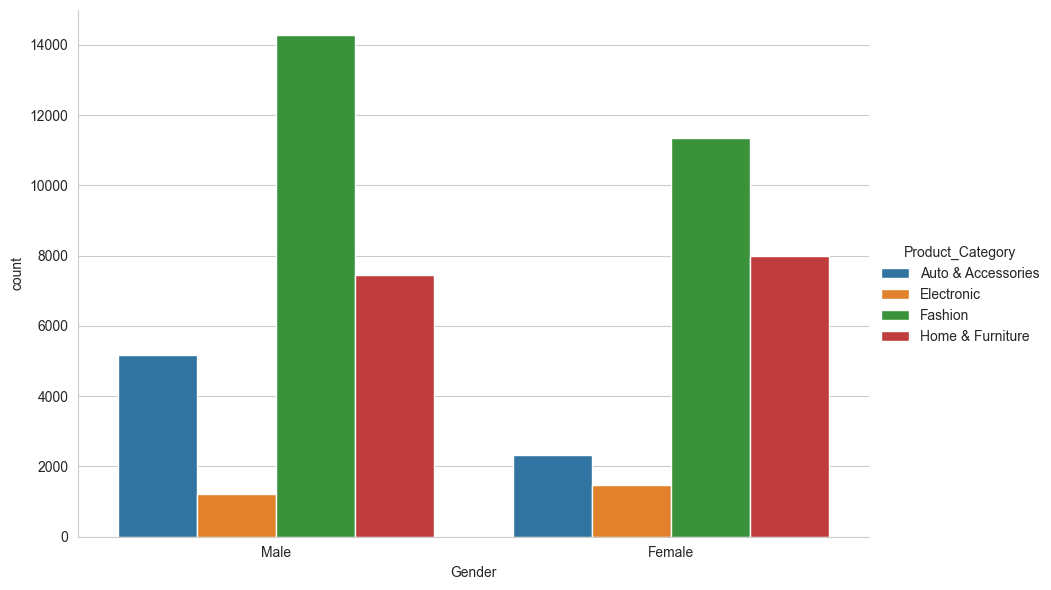

In [26]:
result = data.groupby('Product_Category')['Gender'].value_counts().reset_index(name='count')

sns.set_style('whitegrid')
sns.catplot(x='Gender', y='count', hue='Product_Category', kind='bar', data=result, height=6, aspect=1.5)
plt.show()

# How does the date and time affect sales? 

In [30]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
monthly_sales = data.groupby(pd.Grouper(key='Order_Date', freq='M'))['Sales'].sum()

In [33]:
daily_sales = data.groupby(pd.Grouper(key='Order_Date', freq='D'))['Sales'].sum()

C:\Users\minhp\AppData\Local\Temp\ipykernel_29132\4082288886.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
C:\Users\minhp\AppData\Local\Temp\ipykernel_29132\4082288886.py:21: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, peak in peaks.iteritems():


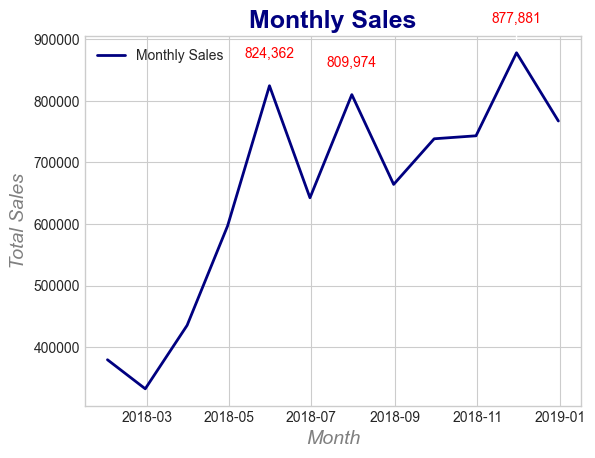

In [46]:
# Define plot style
plt.style.use('seaborn-whitegrid')

# Create figure and axis objects
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10, 8))

# Plot monthly sales
ax1.plot(monthly_sales.index, monthly_sales.values, label='Monthly Sales', color='navy', linewidth=2)

# Set axis labels and title with custom font properties
ax1.set_xlabel('Month', fontdict={'fontsize': 14, 'color': 'gray', 'fontstyle': 'italic'})
ax1.set_ylabel('Total Sales', fontdict={'fontsize': 14, 'color': 'gray', 'fontstyle': 'italic'})
ax1.set_title('Monthly Sales', fontdict={'fontsize': 18, 'color': 'navy', 'fontweight': 'bold'})


# Plot daily sales
ax2.plot(daily_sales.index, daily_sales.values, label='Daily Sales', color='darkorange', linewidth=2)
ax2.set_xlabel('Date',fontdict={'fontsize': 14, 'color': 'gray', 'fontstyle': 'italic'})
ax2.set_ylabel('Total Sales',fontdict={'fontsize': 18, 'color': 'navy', 'fontweight': 'bold'})

# Add gridlines and legend
ax.grid(True)
ax.legend(loc='best')

# Annotate top three peaks
peaks = monthly_sales.nlargest(3)
for i, peak in peaks.iteritems():
    ax.annotate('{:,.0f}'.format(peak), xy=(i, peak), xytext=(i, peak*1.05),
                ha='center', va='bottom', fontsize=10, color='red',
                arrowprops=dict(facecolor='red', arrowstyle='->'))

# Show plot
plt.show()


C:\Users\minhp\AppData\Local\Temp\ipykernel_29132\2030003370.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
C:\Users\minhp\AppData\Local\Temp\ipykernel_29132\2030003370.py:38: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, peak in peaks.iteritems():
C:\Users\minhp\AppData\Local\Temp\ipykernel_29132\2030003370.py:45: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, peak in peaks.iteritems():


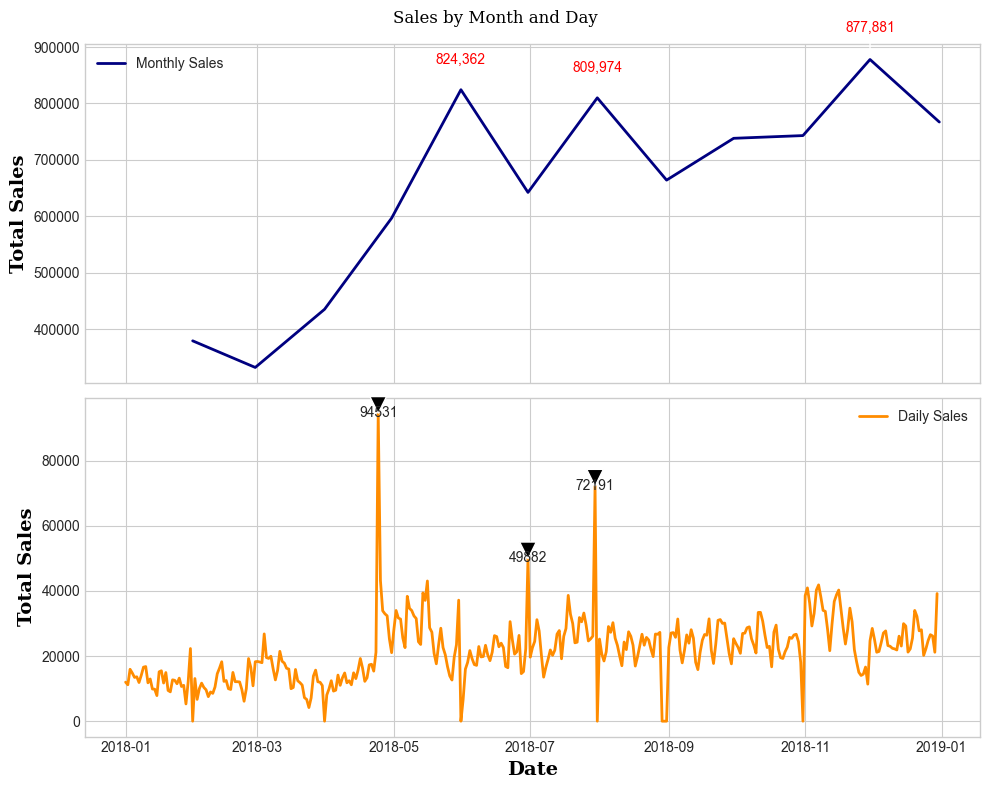

In [54]:
import matplotlib.pyplot as plt

# Define plot style
plt.style.use('seaborn-whitegrid')

# Create figure and axis objects
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10, 8))

# Plot monthly sales
ax1.plot(monthly_sales.index, monthly_sales.values, label='Monthly Sales', color='navy', linewidth=2)
ax1.set_ylabel('Total Sales', fontdict={'size': 14, 'weight': 'bold', 'color': 'black', 'fontfamily': 'serif'})

# Plot daily sales
ax2.plot(daily_sales.index, daily_sales.values, label='Daily Sales', color='darkorange', linewidth=2)
ax2.set_xlabel('Date', fontdict={'size': 14, 'weight': 'bold', 'color': 'black', 'fontfamily': 'serif'})
ax2.set_ylabel('Total Sales', fontdict={'size': 14, 'weight': 'bold', 'color': 'black', 'fontfamily': 'serif'})

# Annotate top three peaks and bottom three lows
peaks = daily_sales.nlargest(3)


for x,y in peaks.items():
    ax2.annotate(f'{y:.0f}', xy=(x, y), xytext=(x, y+100), ha='center', va='center', 
                 arrowprops=dict(facecolor='black', shrink=0.01))

# Set axis titles and legend
fig.suptitle('Sales by Month and Day', fontdict={'size': 18, 'weight': 'bold', 'color': 'black', 'fontfamily': 'serif'})
ax1.legend(loc='best')
ax2.legend(loc='best')

# Add gridlines and tight layout
ax1.grid(True)
ax2.grid(True)
plt.tight_layout()

# Annotate top three peaks
peaks = monthly_sales.nlargest(3)
for i, peak in peaks.iteritems():
    ax1.annotate('{:,.0f}'.format(peak), xy=(i, peak), xytext=(i, peak*1.05),
                ha='center', va='bottom', fontsize=10, color='red',
                arrowprops=dict(facecolor='red', arrowstyle='->'))
    
# Annotate top three peaks
peaks = monthly_sales.nlargest(3)
for i, peak in peaks.iteritems():
    ax2.annotate('{:,.0f}'.format(peak), xy=(i, peak), xytext=(i, peak*1.05),
                ha='center', va='bottom', fontsize=10, color='red',
                arrowprops=dict(facecolor='red', arrowstyle='->'))

# Show plot
plt.show()


# Product that earns the most profit per unit

In [55]:
# calculate profit per unit
data['profit_per_unit'] = data['Profit']/ data['Quantity']

# find product with highest profit per unit
max_profit_product = data.loc[data['profit_per_unit'].idxmax(), 'Product']

print(f"The product that earns the most profit per unit is {max_profit_product}.")

The product that earns the most profit per unit is Tyre.


# Delivery Time distribution of order priority by months

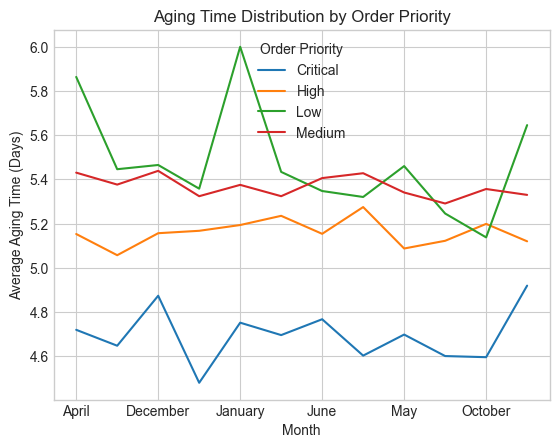

In [57]:
# Extract the month from the 'Order Date' column
data['Month'] = data['Order_Date'].dt.month_name()

# Group the orders by month and order priority, and calculate the average aging time
avg_aging_time = data.groupby(['Month', 'Order_Priority'])['Aging'].mean().unstack()

# Create a line chart to visualize the distribution
avg_aging_time.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Average Aging Time (Days)')
plt.title('Aging Time Distribution by Order Priority')
plt.legend(title='Order Priority')
plt.show()